# Question 1

## (i)

## (ii)

3.179719359162064
2.691256617120528
2.5488985836288225
2.535018175294173
2.5307576680242447
2.528621688423297
2.5272388774478736
2.526217047269771
2.525408483889149
2.5247485468998816
2.524202347837482
2.5237472868453183
2.5233668419458066
2.5230481303957326
2.522780780766819
2.522556307213504
2.522367704632707
2.5222091588607842
2.5220758267236887
2.5219636634916105
2.5218692848239206
2.52178985488631
2.521722994861011
2.5216667076325328
2.521619315472811
2.5215794082787513
2.5215458004415434
2.5215174948232857
2.5214936526130542
2.5214735680677625
2.5214566473217817
2.5214423905966443
2.521430377255218
2.521420253240202
2.521411720512697
2.521404528170769
2.5213984649785255
2.521393353082062
2.5213890427222525
2.521385407786493
2.5213823420659285
2.5213797561060503
2.521377574556621
2.5213757339415173
2.5213741807822747
2.521372870018285
2.521371763677867
2.5213708297591966
2.5213700412887095
2.521369375528195
2.521368813307606
2.521368338462863
2.5213679373631654
2.521367598511917
2

(-2.5, 2.4000000000000044, -2.5, 2.4000000000000044)

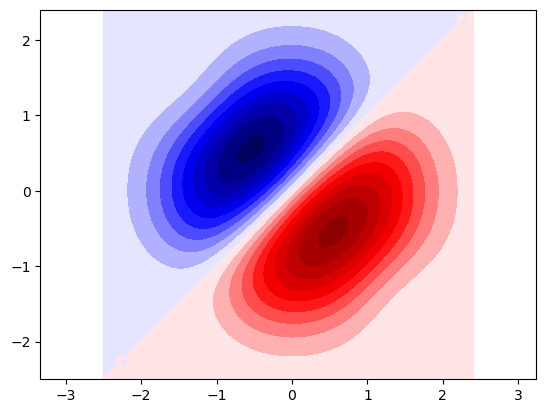

In [1]:
# import packages for basic math, plotting, linear algebra, etc.
from numpy import *
from numpy.linalg import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.special import binom, erf, erfc

def eigSinvH(S,H):
    SinvH = inv(S) @ H
    E, U = eig(SinvH)

    order = argsort(E)
    c = zeros((K, K))
    for i in range(K):
        c[:, i] = U[:, order[i]]
        c[:, i] = c[:, i] / sqrt(c[:, i] @ S @ c[:, i])

    E = sort(E)

    return E, c

alpha = 2
deltax = 0.5

n = 10
K = 2*n + 1

center = arange(-n*deltax,(n+1)*deltax,deltax)

S = zeros((K,K))
h = zeros((K,K))
G = zeros((K,K))

for A in range(K):
    xA = center[A]
    for B in range(K):
        xB = center[B]

        S[A,B] = sqrt(0.5*pi/alpha) * exp(-0.5*alpha* (xA - xB)**2 )

        h[A,B] = 0.5*S[A,B] * (alpha - alpha**2 * (xA - xB)**2 + \
                             0.25*(1/alpha + (xA + xB)**2 ))

        G[A,B] = S[A,B] * ( 3/(16*alpha**2) + \
                            (3/(8*alpha)) * (xA + xB)**2 + \
                            (1/16) * (xA + xB)**4  )

E, c = eigSinvH(S,h)
c1 = c[:,0]
c2 = c[:,1]

a = 1

P = zeros((K,K)) 

niterations = 100
for iteration in range(niterations):

    for D in range(K): # construct density matrix from wavefunction coefficients
        for E in range(K):
            P[D,E] = c2[D]*c2[E] + c1[D]*c1[E]
    # P = outer(c1,c1) + outer(c2,c2)

    heff = h + a * ( trace(P @ G)*G - G @ P @ G ) # defined effective hamiltonian

    E, c = eigSinvH(S,heff) # diagonalize effective hamiltonian and collect coefficients and energies
    c1 = c[:,0]
    c2 = c[:,1]
    e1 = E[0]
    e2 = E[1]

    Etot = 0.5 * ( e1 + e2 + trace(P @ h) ) # total energy of new iteration
    print(Etot)

# Exact energy for a=1 is about 2.438

xvals = arange(-2.5,2.5,0.1)
yvals = xvals
nvals = size(xvals)

chi1 = 0 * xvals
chi2 = 0 * yvals

for A in range(K):
    chi1 += c1[A] * exp(-alpha * (xvals - center[A])**2 )
    chi2 += c2[A] * exp(-alpha * (xvals - center[A])**2 )
plot(xvals,chi1)
plot(yvals,chi2)

clf()
psi = zeros((nvals,nvals))

for i in range(nvals):
    x = xvals[i]
    for j in range(nvals):
        y = yvals[j]

        psi[i,j] = (1/sqrt(2))*(chi1[i] * chi2[j] \
                                - chi2[i] * chi1[j] )

clf()
contourf(xvals, yvals, psi, levels=20, cmap=cm.seismic)
axis('equal')

# Question 2

## (i)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

angle = 104.52
dist = 1.809

R_O = np.array([0, 0, 0])
R_H1 = np.array([dist * np.cos(np.deg2rad(angle/2)), dist * np.sin(np.deg2rad(angle/2)), 0])
R_H2 = np.array([dist * np.cos(np.deg2rad(angle/2)), -dist * np.sin(np.deg2rad(angle/2)), 0])

coords = np.array([R_O, R_H1, R_H2])
coords

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.1072514 ,  1.43055071,  0.        ],
       [ 1.1072514 , -1.43055071,  0.        ]])

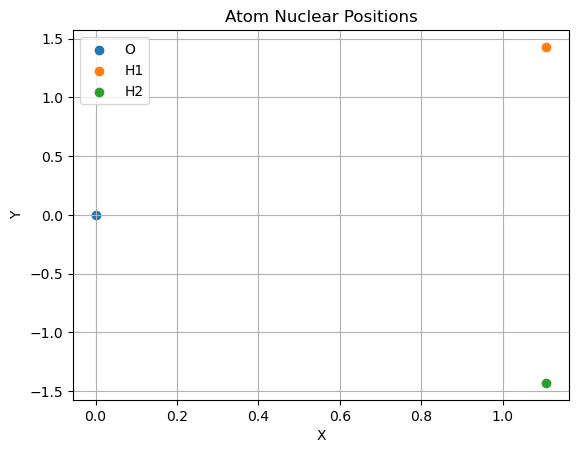

In [30]:
fig, ax = plt.subplots()
ax.scatter(coords[0][0], coords[0][1], label='O')
ax.scatter(coords[1][0], coords[1][1], label='H1')
ax.scatter(coords[2][0], coords[2][1], label='H2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Atom Nuclear Positions')
ax.grid()
ax.legend()

## (ii)

In [31]:
K = 7  # Number of basis functions
L = 2  # Number of Gaussians used to build each basis function

# widths, contraction_coeffs, and centers are matrices 
# to store the parameters of Gaussian functions for each basis function. 
widths = np.zeros((L, K))
contraction_coeffs = np.zeros((L, K))  # d coefficients in Gaussian basis functions
centers = np.zeros((L, K, 3))  # xyz coordinates of Gaussian centers

In [46]:
alpha1s = np.array([-0.151623, -0.851819])
d1s = np.array([0.164964, 0.381381])

zeta_H = 1.24
zeta_O = 7.66

alpha2s = np.array([-0.493363, -1.94523])
d2s = np.array([0.168105, 0.0241442])

alpha2p = np.array([-0.9, -0.9])
dps = np.array([1, 1])

In [72]:
K_H = 2
L_H = 2

widths_H = np.zeros((L_H, K_H))
widths_H[...] = alpha1s[:,np.newaxis] * zeta_H**2

contraction_coeffs_H = np.zeros((L_H, K_H))
contraction_coeffs_H[...] = d1s[:,np.newaxis]

centers_H1 = np.zeros((L_H, K_H, 3))
centers_H1[0,:,:] = coords[1,:]
centers_H1[1,:,:] = coords[1,:]

centers_H2 = np.zeros((L_H, K_H, 3))
centers_H2[0,:,:] = coords[2,:]
centers_H2[1,:,:] = coords[2,:]

In [67]:
K_O = 7
L_O = 2

widths_O = np.zeros((L_O, K_O))
widths_O[...] = alpha1s[:,np.newaxis] * zeta_O**2

contraction_coeffs_H = np.zeros((L_O, K_O))
contraction_coeffs_H[...] = d1s[:,np.newaxis]

centers_H1 = np.zeros((L_O, K_O, 3))
centers_H1[0,:,:] = coords[1,:]
centers_H1[1,:,:] = coords[1,:]

centers_H2 = np.zeros((L_O, K_O, 3))
centers_H2[0,:,:] = coords[2,:]
centers_H2[1,:,:] = coords[2,:]

In [73]:
print(widths_H)
print(contraction_coeffs_H)
print(centers_H1)
print(centers_H2)

[[-0.23313552 -0.23313552]
 [-1.30975689 -1.30975689]]
[[0.164964 0.164964]
 [0.381381 0.381381]]
[[[1.1072514  1.43055071 0.        ]
  [1.1072514  1.43055071 0.        ]]

 [[1.1072514  1.43055071 0.        ]
  [1.1072514  1.43055071 0.        ]]]
[[[ 1.1072514  -1.43055071  0.        ]
  [ 1.1072514  -1.43055071  0.        ]]

 [[ 1.1072514  -1.43055071  0.        ]
  [ 1.1072514  -1.43055071  0.        ]]]


In [ ]:
K_H = 2
L_H = 2

widths_H = np.zeros((L_H, K_H))
contraction_coeffs_H = np.zeros((L_H, K_H))  # d coefficients in Gaussian basis functions
centers_H = np.zeros((L_H, K_H, 3))  # xyz coordinates of Gaussian centers

In [ ]:
xvals = np.arange(-2,4,0.1)
yvals = np.arange(-3, 3, 0.1)